In [31]:
pip install pandas matplotlib seaborn openpyxl

Looking in indexes: http://em-nexus-1.main.oecd.org:8081/repository/pip-group-proxy/simple/
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import necessary Python libraries
import pandas as pd

# Load the dataset from OECD STIP Survey with error handling
url = "https://stip.oecd.org/assets/downloads/STIP_Survey.xlsx"
stip_survey = pd.read_excel(url, engine="openpyxl",dtype=str)
print("Data loaded successfully!")
# Display basic information about the dataset
print("\nNumber of rows in the dataset:", len(stip_survey))
print("\nFirst 5 rows of the dataset:")
display(stip_survey.head())
display(stip_survey.count())

Data loaded successfully!

Number of rows in the dataset: 12660

First 5 rows of the dataset:


,InitiativeID,SurveyYear,CreatedInSurvey,LastModifiedInSurvey,NameEnglish,CountryLabel,CountryCode,NameOriginalLanguage,Acronym,StartDateYear,...,F9:V294,F9:V295,F98:V670,F98:V671,F98:V672,F98:V673,F99:V674,F99:V675,F99:V676,F99:V677
0,Policy Initiative URI,Year of the survey,Creation date in the survey,Last modification date in the survey,English name,Country name,Country code,Name in original language,Acronym,Start year,...,Debt guarantees and risk sharing schemes:Claim...,Debt guarantees and risk sharing schemes:Claim...,Project grants for public research:Maximum gra...,Project grants for public research:Maximum gra...,Project grants for public research:Maximum gra...,Project grants for public research:Maximum gra...,Project grants for public research:Maximum amo...,Project grants for public research:Maximum amo...,Project grants for public research:Maximum amo...,Project grants for public research:Maximum amo...
1,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:11:38Z,2025-08-11T15:05:53Z,INTER,Luxembourg,LUX,NaN,NaN,2006,...,0,0,0,1,0,0,0,0,0,1
2,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:11:38Z,2025-08-11T15:05:53Z,INTER,Luxembourg,LUX,NaN,NaN,2006,...,0,0,0,0,0,0,0,0,0,0
3,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:36:36Z,2025-08-11T15:05:54Z,CORE,Luxembourg,LUX,NaN,NaN,2007,...,0,0,0,0,0,0,0,0,0,0
4,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:20:00Z,2025-08-11T15:05:54Z,Open Access Fund,Luxembourg,LUX,Open Access Fund,NaN,2017,...,0,0,0,0,0,0,0,0,0,0


InitiativeID            12660
SurveyYear              12660
CreatedInSurvey         12660
LastModifiedInSurvey    12660
NameEnglish             12638
                        ...  
F98:V673                12660
F99:V674                12660
F99:V675                12660
F99:V676                12660
F99:V677                12660
Length: 519, dtype: int64

In [33]:
#To facilitate working with the dataset, we generate a separate 'Codebook' dataframe listing the column names and the detail given in the first row, for variables on themes and direct beneficiaries

# 1. Get column names (Code) and the first row (Meaning) from the DataFrame
columns = stip_survey.columns
meanings = stip_survey.iloc[0].values

# 2. Create a DataFrame pairing each column name with its description
codebook = pd.DataFrame({
    "Code": columns,
    "Meaning": meanings
})

# 3. Filter only columns whose names start with "TH" or "TG" (policy themes and direct beneficiaries)
codebook = codebook[codebook["Code"].str.match(r"^TH|^TG")].reset_index(drop=True)

# 4. Display the first 10 rows of the codebook
print("First 5 rows of the codebook:")
print(codebook.head(5))

# 5. Specifically look for the new 2025 themes (TH110, TH111, TH112)
new_themes = ['TH110', 'TH111', 'TH112']
print("\nNew 2025 themes:")
for theme in new_themes:
    if theme in codebook['Code'].values:
        theme_info = codebook[codebook['Code'] == theme]
        print(f"{theme}: {theme_info['Meaning'].iloc[0]}")
    else:
        print(f"{theme}: Not found in dataset")



First 5 rows of the codebook:
    Code                                            Meaning
0  TH101                Net zero transitions policy debates
1  TH102   Government capabilities for net zero transitions
2  TH103     Net zero transitions in transport and mobility
3  TH104       Net zero transitions in food and agriculture
4  TH106  Digital transformation of research-performing ...

New 2025 themes:
TH110: Dynamic skills and capabilities for policymaking
TH111: Strategic Autonomy and promotion of critical technologies
TH112: Net zero transitions in steel


In [34]:
# Data preprocessing
# Remove the description row to keep only observational data
stip_survey = stip_survey.iloc[1:].reset_index(drop=True)

# Convert theme and target group columns to numeric format
th_tg_cols = [col for col in stip_survey.columns if col.startswith('TH') or col.startswith('TG')]
stip_survey[th_tg_cols] = stip_survey[th_tg_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a separate DataFrame with unique initiatives only
stip_survey_unique = stip_survey.drop_duplicates(subset=['InitiativeID']).copy()

print("Data loaded and prepared.")
print(f"Total policy instruments (rows): {len(stip_survey)}")
print(f"Total unique policy initiatives: {len(stip_survey_unique)}")
stip_survey_unique.head()

Data loaded and prepared.
Total policy instruments (rows): 12659
Total unique policy initiatives: 8715


,InitiativeID,SurveyYear,CreatedInSurvey,LastModifiedInSurvey,NameEnglish,CountryLabel,CountryCode,NameOriginalLanguage,Acronym,StartDateYear,...,F9:V294,F9:V295,F98:V670,F98:V671,F98:V672,F98:V673,F99:V674,F99:V675,F99:V676,F99:V677
0,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:11:38Z,2025-08-11T15:05:53Z,INTER,Luxembourg,LUX,NaN,NaN,2006,...,0,0,0,1,0,0,0,0,0,1
2,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:36:36Z,2025-08-11T15:05:54Z,CORE,Luxembourg,LUX,NaN,NaN,2007,...,0,0,0,0,0,0,0,0,0,0
3,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:20:00Z,2025-08-11T15:05:54Z,Open Access Fund,Luxembourg,LUX,Open Access Fund,NaN,2017,...,0,0,0,0,0,0,0,0,0,0
5,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:40:34Z,2025-08-11T15:05:55Z,Integrated BioBank of Luxembourg,Luxembourg,LUX,NaN,IBBL,2010,...,0,0,0,0,0,0,0,0,0,0
6,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T15:24:56Z,2025-08-11T15:33:32Z,The 3rd Industrial Revolution Strategy,Luxembourg,LUX,"Etude stratégique ""Troisième Révolution Indust...",NaN,2016,...,0,0,0,0,0,0,0,0,0,0


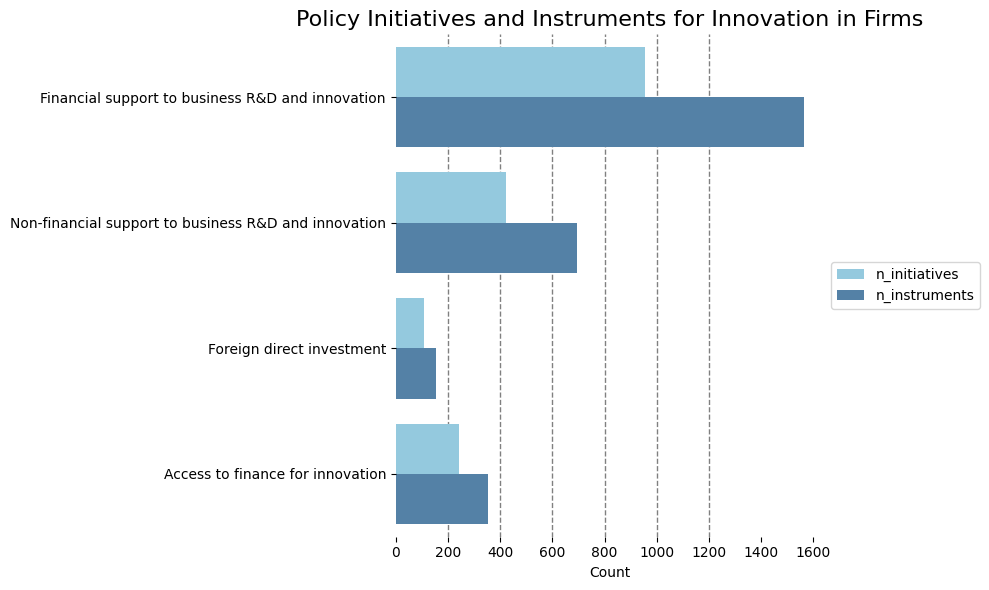

In [35]:

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Remove columns that start with "F" (make a copy to avoid SettingWithCopyWarning) ---
financing_innovation = stip_survey.loc[:, ~stip_survey.columns.str.startswith('F')].copy()

# --- 2. Filter rows where at least one of the target themes is present ---
theme_cols = ['TH31', 'TH32', 'TH36', 'TH38']
# Ensure theme columns are numeric
financing_innovation[theme_cols] = financing_innovation[theme_cols].apply(pd.to_numeric, errors='coerce')
# Keep rows where the sum of these columns is greater than 0
financing_innovation = financing_innovation[financing_innovation[theme_cols].sum(axis=1) > 0]

# --- 3. Reshape to long format for the four themes ---
financing_long = financing_innovation.melt(
    id_vars=[col for col in financing_innovation.columns if col not in theme_cols],
    value_vars=theme_cols,
    var_name='Theme',
    value_name='value'
)
# Keep only rows where the theme is present (value == 1)
financing_long = financing_long[financing_long['value'] == 1]

# --- 4. Count the number of instruments per InitiativeID and Theme ---
grouped = financing_long.groupby(['InitiativeID', 'Theme']).size().reset_index(name='n_instruments')

# --- 5. For each Theme, keep only unique InitiativeID and summarize ---
unique_initiatives = grouped.drop_duplicates(subset=['Theme', 'InitiativeID'])
summary = unique_initiatives.groupby('Theme').agg(
    n_initiatives=('InitiativeID', 'nunique'),
    n_instruments=('n_instruments', 'sum')
).reset_index()
# --- 6. Map theme codes to descriptive labels for plotting ---
theme_labels = {
    'TH31': 'Financial support to business R&D and innovation',
    'TH32': 'Non-financial support to business R&D and innovation',
    'TH36': 'Foreign direct investment',
    'TH38': 'Access to finance for innovation'
}
summary['Theme_label'] = summary['Theme'].map(theme_labels)

# --- 7. Reshape summary for plotting (long format) ---
plot_df = pd.melt(
    summary,
    id_vars='Theme_label',
    value_vars=['n_initiatives', 'n_instruments'],
    var_name='Type',
    value_name='Count'
)

# --- 8. Plot grouped horizontal bar chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    y='Theme_label',
    x='Count',
    hue='Type',
    palette=['skyblue', 'steelblue']
)
for x in [200, 400, 600, 800, 1000,1200]:
    plt.axvline(x, color='gray', linestyle='--', lw=1, zorder=0)
sns.despine(left=True, bottom=True)

plt.title('Policy Initiatives and Instruments for Innovation in Firms', fontsize=16)
plt.xlabel('Count')
plt.ylabel('')
plt.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

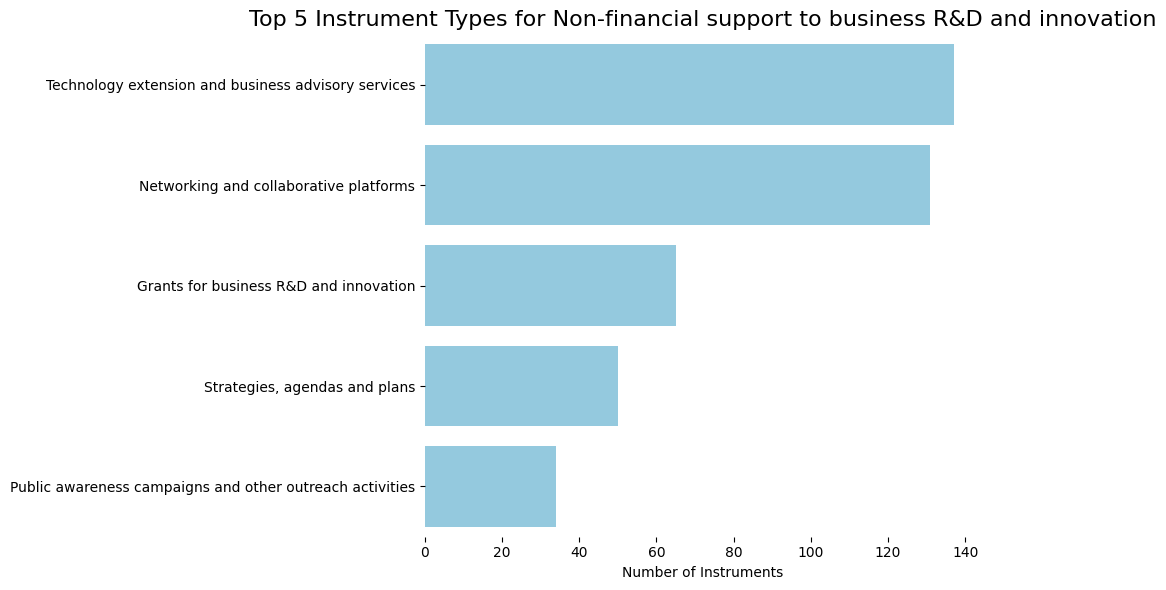

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Remove columns that start with "F"
th32_instruments = stip_survey.loc[:, ~stip_survey.columns.str.startswith('F')]

# 2. Filter rows where TH32 > 0 (ignore non-numeric rows)
th32_instruments = th32_instruments[
    pd.to_numeric(th32_instruments['TH32'], errors='coerce') > 0
]

# 3. Group by 'InstrumentTypeLabel' and count occurrences
th32_instruments = (
    th32_instruments
    .groupby('InstrumentTypeLabel')
    .size()
    .reset_index(name='n')
)

# 4. Get the top 5 by count, descending order
th32_instruments = th32_instruments.nlargest(5, 'n').sort_values('n', ascending=False)

# 5. Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=th32_instruments,
    y='InstrumentTypeLabel',
    x='n',
    color='skyblue'
)
sns.despine(left=True, bottom=True)
plt.title('Top 5 Instrument Types for Non-financial support to business R&D and innovation', fontsize=16)
plt.xlabel('Number of Instruments')
plt.ylabel('')
plt.tight_layout()
plt.show()